In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [ ]:
y.shape

(100,)

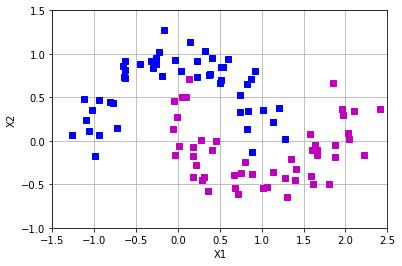

In [ ]:
def plot_dataset(X, y, axes):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
  plt.plot(X[:,0][y==1], X[:,1][y==1],"ms")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [ ]:
def plot_svm_clf(svm_clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = svm_clf.predict(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [ ]:

poly_svm_clf=Pipeline((
      ('poly_features', PolynomialFeatures(degree=3)),
      ('scaler', StandardScaler()),
      ('svm', SVC(kernel='poly', degree=10, coef0=1, C=5))
  ))

poly_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

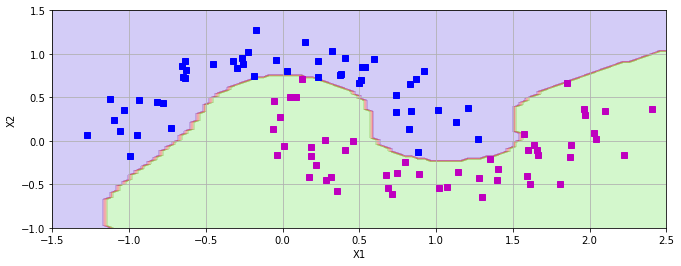

In [ ]:
plt.figure(figsize=(11,4))
plot_svm_clf(poly_svm_clf, [-1.5, 2.5, -1, 1.5])

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()